In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/CRM/Supermarket Data.csv"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv(data_path)

In [ ]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
6,200731,20070929,7,18,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237810,L,MM,Full Shop,Fresh,STORE00001,LS,E02


#### Establish key feature for customer
1. total spend
2. total_vist
3. avg_weekly_visit
4. avg_weekly_spend
5. avg_basket_size
6. total_quantity

In [ ]:
total_spend = df.groupby(['CUST_CODE']).sum()["SPEND"]
total_spend.sort_values(ascending = False)

CUST_CODE
CUST0000123240    14998.11
CUST0000420363     8281.66
CUST0000414514     7189.03
CUST0000372422     7183.85
CUST0000219191     6610.69
                    ...   
CUST0000130700        0.01
CUST0000040781        0.01
CUST0000196176        0.01
CUST0000692133        0.01
CUST0000201137        0.01
Name: SPEND, Length: 5292, dtype: float64

In [ ]:
last_visit = df.groupby(['CUST_CODE'])["SHOP_DATE"].max()
last_visit

CUST_CODE
CUST0000000369    20080705
CUST0000001194    20080620
CUST0000002257    20060721
CUST0000002499    20060414
CUST0000002605    20080612
                    ...   
CUST0000999569    20080704
CUST0000999593    20080402
CUST0000999645    20080508
CUST0000999935    20080605
CUST0000999936    20080417
Name: SHOP_DATE, Length: 5292, dtype: int64

In [ ]:
total_visit = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique()
total_visit

CUST_CODE
CUST0000000369    220
CUST0000001194    103
CUST0000002257      1
CUST0000002499      1
CUST0000002605      6
                 ... 
CUST0000999569    109
CUST0000999593     30
CUST0000999645     11
CUST0000999935     21
CUST0000999936      6
Name: BASKET_ID, Length: 5292, dtype: int64

In [ ]:
avg_weekly_visit = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique() / (df.groupby(['CUST_CODE'])['SHOP_WEEK'].nunique())
avg_weekly_visit.sort_values(ascending = False)

CUST_CODE
CUST0000889222    6.000000
CUST0000224455    5.741379
CUST0000820750    5.333333
CUST0000540040    4.947368
CUST0000123240    4.817391
                    ...   
CUST0000537835    1.000000
CUST0000537584    1.000000
CUST0000895271    1.000000
CUST0000537231    1.000000
CUST0000999936    1.000000
Length: 5292, dtype: float64

In [ ]:
avg_weekly_spend = df.groupby(['CUST_CODE']).sum()["SPEND"] /  (df.groupby(['CUST_CODE'])['SHOP_WEEK'].nunique())
avg_weekly_spend.sort_values(ascending = False)

CUST_CODE
CUST0000340481    306.97
CUST0000903655    181.97
CUST0000764951    165.73
CUST0000889983    133.99
CUST0000342807    133.08
                   ...  
CUST0000201137      0.01
CUST0000075952      0.01
CUST0000196176      0.01
CUST0000081263      0.01
CUST0000826627      0.01
Length: 5292, dtype: float64

In [ ]:
avg_basket_size = df.groupby(['CUST_CODE']).sum()["SPEND"]  /  (df.groupby(['CUST_CODE'])['BASKET_ID'].nunique())
avg_basket_size.sort_values(ascending = False)

CUST_CODE
CUST0000340481    306.97
CUST0000903655    181.97
CUST0000764951    165.73
CUST0000889983    133.99
CUST0000342807    133.08
                   ...  
CUST0000923281      0.01
CUST0000130700      0.01
CUST0000665561      0.01
CUST0000179503      0.01
CUST0000201137      0.01
Length: 5292, dtype: float64

In [ ]:
total_quantity = df.groupby(['CUST_CODE']).sum()["QUANTITY"]
total_quantity.sort_values(ascending = False)

CUST_CODE
CUST0000123240    17659
CUST0000420363     6362
CUST0000836232     5166
CUST0000414514     5136
CUST0000565459     5059
                  ...  
CUST0000693990        1
CUST0000779987        1
CUST0000692133        1
CUST0000867105        1
CUST0000695675        1
Name: QUANTITY, Length: 5292, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Establish dataframe

In [ ]:
cust_list = df["CUST_CODE"].unique()

In [ ]:
row_list = []

for i in cust_list:
    total_spend = float(df[df["CUST_CODE"] == i]["SPEND"].sum())
    total_visit = df.groupby(['CUST_CODE'])['BASKET_ID'].nunique()
    total_visit = float(df[df['CUST_CODE'] == i ]['BASKET_ID'].nunique())
    avg_weekly_visit = float(df[df["CUST_CODE"] == i]['BASKET_ID'].nunique() / (df[df["CUST_CODE"] == i]['SHOP_WEEK'].nunique()))
    avg_weekly_spend =df[df["CUST_CODE"] == i]["SPEND"].sum()/  (df[df["CUST_CODE"] == i]['SHOP_WEEK'].nunique())
    avg_basket_size = df[df["CUST_CODE"] == i]["SPEND"].sum()  /  (df[df["CUST_CODE"] == i]['BASKET_ID'].nunique())
    total_quantity = df[df["CUST_CODE"] == i].sum()["QUANTITY"]

    row_dict = {"cust_id" : i,"total_spend":total_spend , "total_visit": total_visit , "avg_weekly_visit" : avg_weekly_visit ,"avg_weekly_spend" : avg_weekly_spend , "avg_basket_size":avg_basket_size , "total_quantity":total_quantity}
    print(row_dict)
    row_list.append(row_dict)

Streaming output truncated to the last 5000 lines.
{'cust_id': 'CUST0000116158', 'total_spend': 279.29, 'total_visit': 25.0, 'avg_weekly_visit': 1.0869565217391304, 'avg_weekly_spend': 12.14304347826087, 'avg_basket_size': 11.171600000000002, 'total_quantity': 267}
{'cust_id': 'CUST0000041470', 'total_spend': 138.20000000000002, 'total_visit': 4.0, 'avg_weekly_visit': 1.0, 'avg_weekly_spend': 34.550000000000004, 'avg_basket_size': 34.550000000000004, 'total_quantity': 95}
{'cust_id': 'CUST0000899418', 'total_spend': 758.9399999999999, 'total_visit': 69.0, 'avg_weekly_visit': 1.3269230769230769, 'avg_weekly_spend': 14.594999999999999, 'avg_basket_size': 10.999130434782607, 'total_quantity': 579}
{'cust_id': 'CUST0000671293', 'total_spend': 2223.3, 'total_visit': 121.0, 'avg_weekly_visit': 1.5125, 'avg_weekly_spend': 27.79125, 'avg_basket_size': 18.374380165289256, 'total_quantity': 1151}
{'cust_id': 'CUST0000543270', 'total_spend': 23.05, 'total_visit': 3.0, 'avg_weekly_visit': 1.5, 'av

In [ ]:
df[df["CUST_CODE"] == "CUST0000123240"]["SPEND"].sum()

14998.11

In [ ]:
cust_data = pd.DataFrame(data=row_list,columns=["cust_id","total_spend","total_visit","avg_weekly_visit","avg_weekly_spend","avg_basket_size","total_quantity"])

In [ ]:
cust_data.to_csv("cust_data.csv")

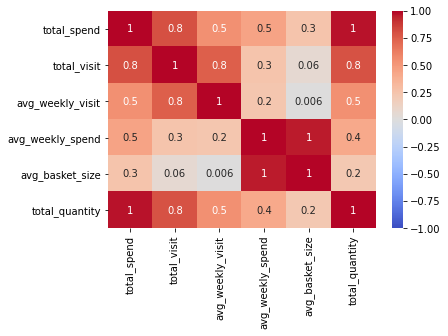

In [ ]:
#importing all the libraries needed
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cust_data.corr(),annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0,cmap= 'coolwarm')

In [ ]:
cust_data.head()

,cust_id,total_spend,total_visit,avg_weekly_visit,avg_weekly_spend,avg_basket_size,total_quantity
0,CUST0000583261,529.38,23.0,1.095238,25.208571,23.016522,282
1,CUST0000537317,1805.39,153.0,1.779070,20.992907,11.799935,1280
2,CUST0000472158,3600.86,392.0,3.408696,31.311826,9.185867,3060
3,CUST0000099658,4874.18,284.0,2.535714,43.519464,17.162606,3832
4,CUST0000128681,455.28,24.0,1.142857,21.680000,18.970000,280
